Импортируем pandas

In [367]:
import pandas as pd

Импортируем датасет с ирисами

In [368]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/aayush2906/Iris_flower_classification-Data-Science/refs/heads/master/Iris.csv').drop('Id', axis=1)

Взглянем на данные

In [369]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Так как данные в таблице уже кластеризованы, можно построить графики по ним, чтобы знать, к чему стремиться

In [370]:
import seaborn as sns
import matplotlib.pyplot as plt

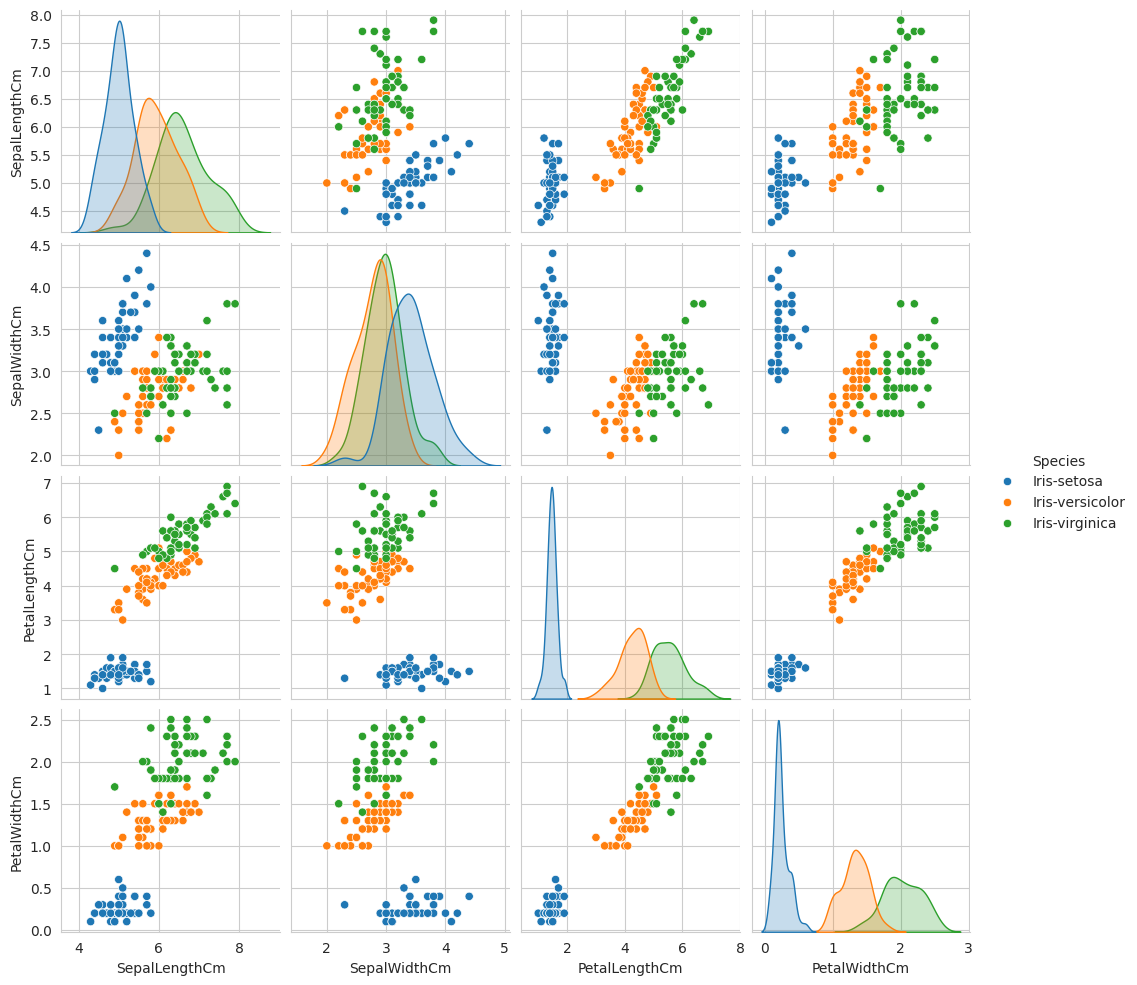

In [371]:
sns.set_style("whitegrid")
sns.pairplot(iris_data,hue="Species")
plt.show()

Теперь избавимся от лишних данных и попробуем кластеризовать самостоятельно

In [372]:
X = iris_data.iloc[:, [0, 1, 2, 3]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Импортируем scikit-learn

In [373]:
from sklearn.cluster import KMeans

Теперь обучим модель k-средних

In [374]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0)
y = kmeans.fit_predict(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Подсчитаем количество значений в кластерах

In [375]:
pd.value_counts(y)

/tmp/ipykernel_21031/3605348509.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


0    61
1    50
2    39
Name: count, dtype: int64

Видно, что кластеризация не идеальна, но попробуем построить графики

Выделим центры кластеров

In [376]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
centers['Species'] = 'Centroid'
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.883607,2.740984,4.388525,1.434426,Centroid
1,5.006000,3.418000,1.464000,0.244000,Centroid
2,6.853846,3.076923,5.715385,2.053846,Centroid


Добавим к данным центры и номера полученных клстеров

In [377]:
X['Species'] = y
X = pd.concat([X, centers])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,1
1,4.900000,3.000000,1.400000,0.200000,1
2,4.700000,3.200000,1.300000,0.200000,1
3,4.600000,3.100000,1.500000,0.200000,1
4,5.000000,3.600000,1.400000,0.200000,1
...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,2
149,5.900000,3.000000,5.100000,1.800000,0
0,5.883607,2.740984,4.388525,1.434426,Centroid
1,5.006000,3.418000,1.464000,0.244000,Centroid


Построим графики

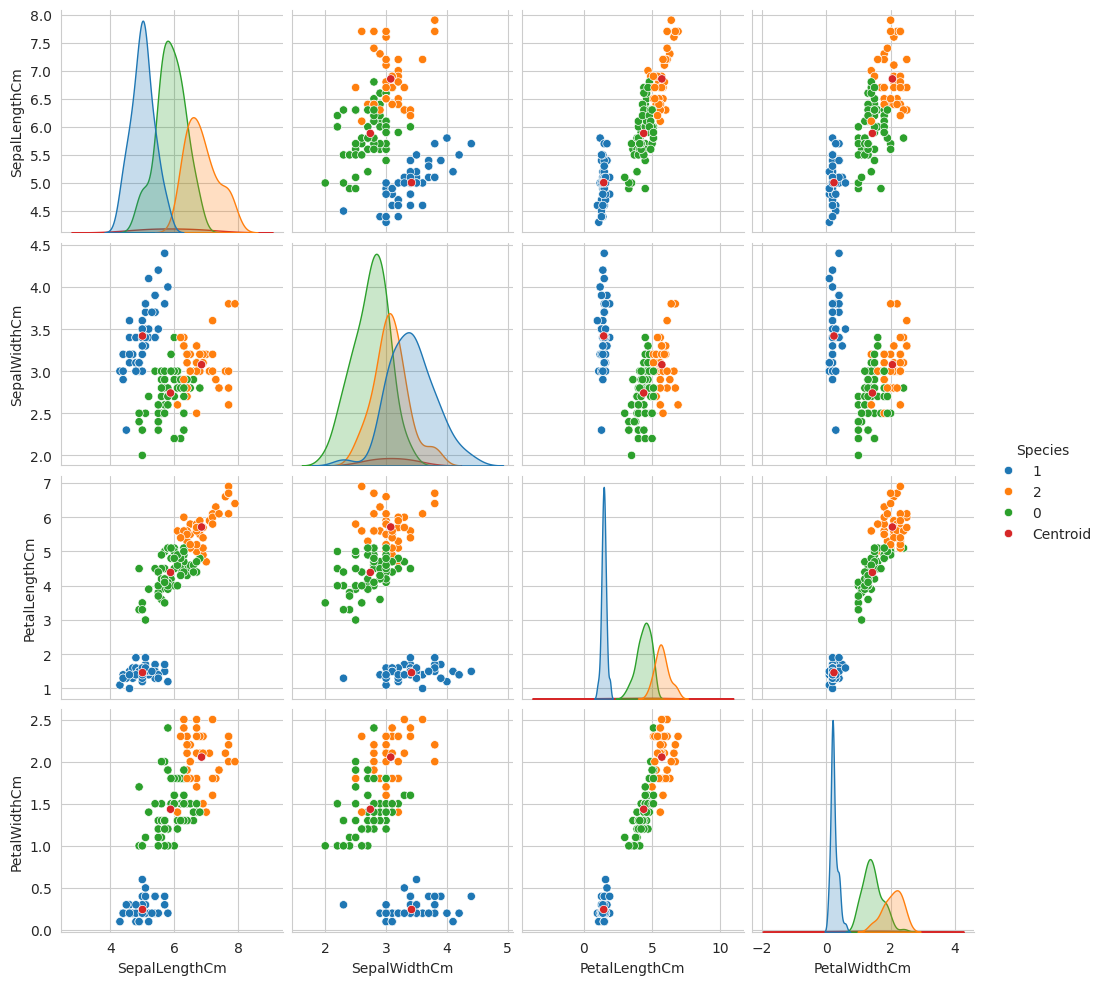

In [378]:
sns.set_style("whitegrid")
sns.pairplot(X,hue="Species")
plt.show()